In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import scanpy as sc
import lineagevi
import scvelo as scv
import numpy as np

In [3]:
adata = sc.read_h5ad('/Users/lgolinelli/git/lineageVI/notebooks/data/inputs/anndata/processed/pancreas.h5ad')

In [4]:
model_path = '/Users/lgolinelli/git/lineageVI/notebooks/data/outputs/pancreas/vae_velocity_model.pt'

linvi = lineagevi.utils.load_model(
    adata,
    model_path=model_path,
    map_location='cpu',
    n_hidden=128,
    training=False
)

In [5]:
linvi.get_model_outputs(
    adata=adata,
    n_samples=100,
    return_mean=True,
    return_negative_velo=True,
    base_seed=0,
    save_to_adata=True,
    unspliced_key='Mu',
    spliced_key='Ms',
    latent_key='z',
    nn_key='indices'
)

computing velocity graph (using 1/10 cores)
or disable the progress bar using `show_progress_bar=False`.
    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


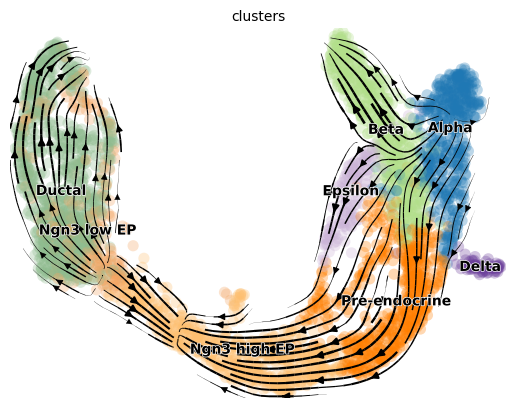

In [6]:
sc.pp.neighbors(adata, use_rep='X_pca')
scv.tl.velocity_graph(adata, vkey='velocity', xkey='Ms')
scv.pl.velocity_embedding_stream(adata, vkey='velocity', color='clusters')

In [ ]:
linvi.map_velocities(
    adata,
    direction="gp_to_gene",
    n_samples=100,
    scale=10.0,
    velocity_key="velocity_gp2gene",
    return_gp_adata=False
)

computing velocity graph (using 1/10 cores)
    finished (0:00:01) --> added 
    'gp2gene_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'gp2gene_velocity_umap', embedded velocity vectors (adata.obsm)


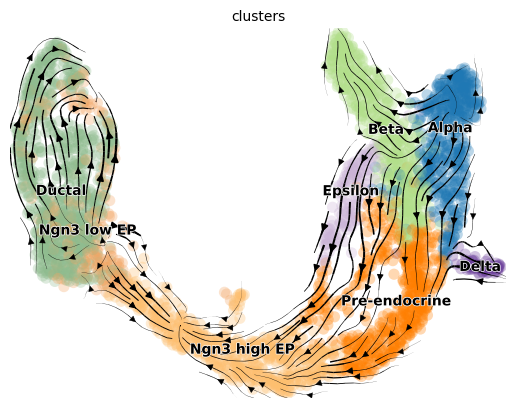

In [8]:
sc.pp.neighbors(adata, use_rep='mean')
scv.tl.velocity_graph(adata, vkey='gp2gene_velocity', xkey='Ms')
scv.pl.velocity_embedding_stream(adata, vkey='gp2gene_velocity', color='clusters')

In [ ]:
gp_adata = linvi.map_velocities(
    adata,
    direction="gene_to_gp",
    n_samples=100,
    scale=10.0,
    velocity_key="velocity_gene2gp",
    return_gp_adata=True,
    return_negative_velo=True
)

computing velocity graph (using 1/10 cores)
    finished (0:00:00) --> added 
    'gene2gp_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'gene2gp_velocity_umap', embedded velocity vectors (adata.obsm)


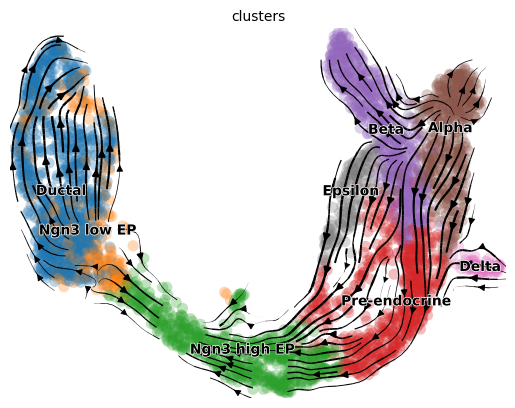

In [10]:
sc.pp.pca(gp_adata)
sc.pp.neighbors(gp_adata)
scv.tl.velocity_graph(gp_adata, vkey='gene2gp_velocity', xkey='Ms')
scv.pl.velocity_embedding_stream(gp_adata, vkey='gene2gp_velocity', color='clusters')